In [130]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score

In [2]:
!pip install wordcloud

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

! pip install langdetect
from langdetect import detect

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lilyliang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lilyliang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [144]:
spam_or_not_df = "https://raw.githubusercontent.com/AliceLiu17/csc448_final/main/data/combined_data_clean.csv"

df = pd.read_csv(spam_or_not_df)

In [145]:
df.head()

,label,email
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [35]:
# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [36]:
df.head()

,label,email
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [37]:
email_column = df['email']

# Set the max_colwidth option to None to display the entire content
pd.set_option('display.max_colwidth', None)

# Display the entire 'email' column
print(email_column)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [38]:
# Check for null values
df.isnull().sum()

label    0
email    1
dtype: int64

In [39]:
# Filter rows with null values in the 'email' column
rows_with_null_email = df[df['email'].isnull()]

# Display rows with null values in the 'email' column
if not rows_with_null_email.empty:
    print("Rows with null values in the 'email' column:")
    print(rows_with_null_email)
else:
    print("No null values found in the 'email' column.")

Rows with null values in the 'email' column:
      label email
7998      1   NaN


In [40]:
print(df.shape)

# df.dropna(inplace=True)
df = df.dropna()

# Sanity Check
print(df.shape)

# pring how many null values there are
df.isnull().sum()

(8030, 2)
(8029, 2)


label    0
email    0
dtype: int64

In [41]:
df.duplicated().sum()

0

In [42]:
df['label'].value_counts()

0    6961
1    1068
Name: label, dtype: int64

In [12]:
# # Function to detect language
# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return 'unknown'

# # Apply language detection to each email
# df['detected_language'] = df['email'].apply(detect_language)

# # Filter out non-English emails
# non_english_emails = df[df['detected_language'] != 'en']

# # Display an example of a non-English email
# if len(non_english_emails) > 0:
#     non_english_example = non_english_emails.iloc[2]  # Selecting the first non-English email as an example
#     print("Example of a non-English email:")
#     print(non_english_example['email'])
# else:
#     print("No non-English emails found in the dataset.")


In [43]:
# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Apply language detection to each email
df['detected_language'] = df['email'].apply(detect_language)

# Count the number of non-English emails and English emails
non_english_count = len(df[df['detected_language'] != 'en'])
english_count = len(df[df['detected_language'] == 'en'])

# Calculate the ratio
if english_count > 0:
    ratio_non_english_to_english = non_english_count / english_count
    print(f"Ratio of non-English emails to English emails: {ratio_non_english_to_english:.2f}")
else:
    print("No English emails found in the dataset.")

Ratio of non-English emails to English emails: 0.06


In [44]:
df.head(10)

,label,email,detected_language
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",en
1,0,Ok lar... Joking wif u oni...,id
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,en
3,0,U dun say so early hor... U c already then say...,en
4,0,"Nah I don't think he goes to usf, he lives around here though",en
5,1,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",en
6,0,Even my brother is not like to speak with me. They treat me like aids patent.,en
7,0,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,en
8,1,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,en
9,1,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,en


In [45]:
# Apply language detection to each email
df['detected_language'] = df['email'].apply(detect_language)

# Filter out non-English emails
df = df[df['detected_language'] == 'en']

In [46]:
df.shape

(7529, 3)

In [47]:
df.head()

,label,email,detected_language
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",en
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,en
3,0,U dun say so early hor... U c already then say...,en
4,0,"Nah I don't think he goes to usf, he lives around here though",en
5,1,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",en


In [49]:
df['num_characters'] = df['email'].apply(len)
df['num_words'] = df['email'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['email'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [50]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,7529.000000,7529.000000,7529.000000
mean,569.273476,102.278789,1.642449
std,2171.923973,364.850653,1.268721
min,7.000000,1.000000,1.000000
25%,52.000000,13.000000,1.000000
50%,132.000000,27.000000,1.000000
75%,520.000000,93.000000,2.000000
max,82994.000000,13309.000000,38.000000


In [53]:
# for real emails
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

# real emails have more words 

,num_characters,num_words,num_sentence
count,6487.000000,6487.000000,6487.000000
mean,517.490211,93.711577,1.551102
std,2005.069793,334.912911,1.201090
min,7.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,107.000000,24.000000,1.000000
75%,487.000000,88.000000,2.000000
max,82994.000000,13309.000000,38.000000


In [54]:
# for spam emails
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1042.000000,1042.000000,1042.000000
mean,891.651631,155.614203,2.211132
std,2990.555289,510.357682,1.508717
min,13.000000,2.000000,1.000000
25%,143.000000,27.000000,1.000000
50%,158.000000,33.000000,2.000000
75%,796.750000,127.500000,3.000000
max,69860.000000,11602.000000,9.000000


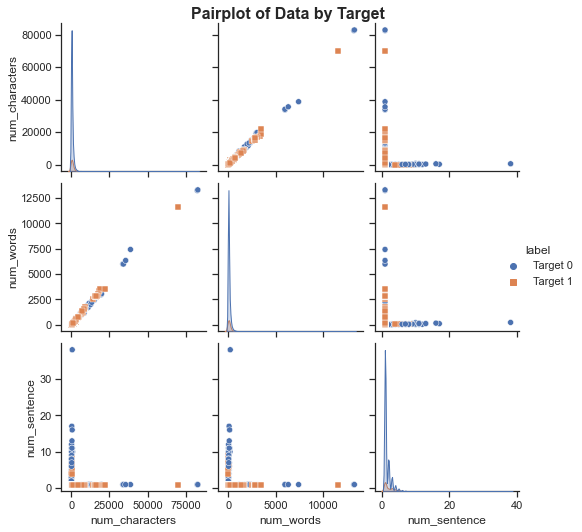

In [68]:
# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='label', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('label')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

In [70]:
df[['label','num_characters', 'num_words', 'num_sentence']].corr()

,label,num_characters,num_words,num_sentence
label,1.000000,0.059492,0.058592,0.179657
num_characters,0.059492,1.000000,0.997834,-0.101089
num_words,0.058592,0.997834,1.000000,-0.096629
num_sentence,0.179657,-0.101089,-0.096629,1.000000


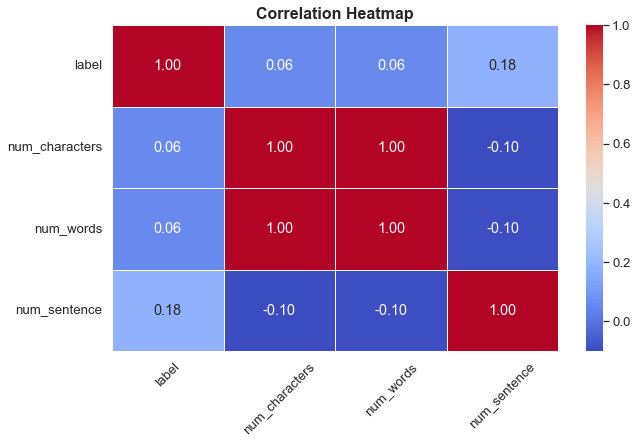

In [71]:
# Select the columns for the correlation matrix
correlation_matrix = df[['label', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

In [72]:
## Data Preprocessing

In [74]:
# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [76]:
df['transformed_text'] = df['email'].apply(transform_text)

In [77]:
df.head()

,label,email,detected_language,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",en,111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,en,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,en,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",en,61,15,1,nah think goe usf live around though
5,1,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",en,147,39,4,freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv


In [87]:
!pip install wordcloud

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [91]:
!pip install --upgrade wordcloud matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.1/257.1 kB 8.4 MB/s eta 0:00:00
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3


In [96]:
# # word cloud didnt work
# wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
# spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep = " "))
# plt.figure(figsize = (15,6))
# plt.imshow(spam_wc)
# plt.show()

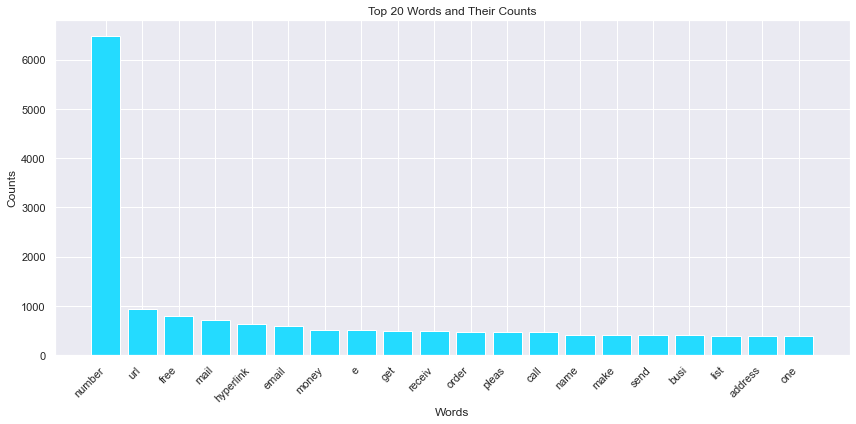

In [98]:
# Sample text for creating word frequencies
text = df[df['label'] == 1]['transformed_text'].str.cat(sep=" ")

# Split the text into words and count their occurrences
word_counts = Counter(text.split())

# Get the top words and their counts (e.g., top 20 words)
top_words = word_counts.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_words)

# Set the 'cool' color palette
sns.set_palette('cool')


# Plot the top words and their counts
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 20 Words and Their Counts')
plt.tight_layout()
plt.show()


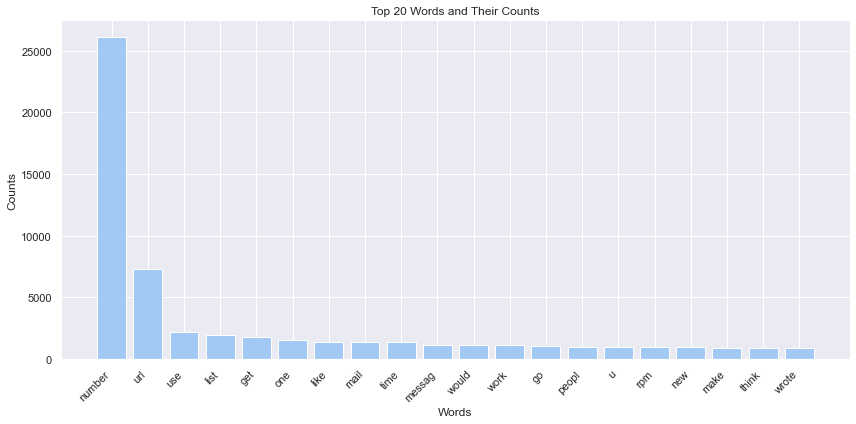

In [101]:
# Sample text for creating word frequencies
text = df[df['label'] == 0]['transformed_text'].str.cat(sep=" ")

# Split the text into words and count their occurrences
word_counts = Counter(text.split())

# Get the top words and their counts (e.g., top 20 words)
top_words = word_counts.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_words)

# Set the 'cool' color palette
sns.set_palette('pastel')


# Plot the top words and their counts
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 20 Words and Their Counts')
plt.tight_layout()
plt.show()


In [102]:
# spam_carpos = []
# for sentence in df[df['label'] == 1]['transformed_text'].tolist():
#     for word in sentence.split():
#         spam_carpos.append(word)
        
# filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
# sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
# plt.xticks(rotation = 90)
# plt.show()
# # same as above